In [1]:
import math as mt
from pylab import *
from scipy.stats import *
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

### 4. Сравнение оценок. Эффективные оценки. Задача 3.
Условие: Рассмотрим $X_1, \ldots, X_n$ из распределения Бернулли с параметром $\theta$. По сетке значений $\theta \in [0, 1]$ с шагом 0.01 постройте график зависимостей нижней оценки дисперсии произвольной несмещенной оценки из неравенства Рао-Крамера от $\theta$. Какой можно сделать вывод (напишите в комментариях)? Для каждого значения $\theta$ (для той же сетки) сгенерируйте выборку размера $n = 1000$ для параметра $\theta$, посчитайте эффективную оценку $\theta$ и бутстрепную оценку дисперсии (параметрический бутстреп, количество бутстрепных выборок равно 500) этой эффективной оценки $\theta$. Нарисуйте график зависимости полученных бутстрепных оценок от $\theta$.

In [2]:
#заданные константы
n = 1000
theta = np.arange(0, 1.01, 0.01)
K = 500  #Число бутстрепных выборок

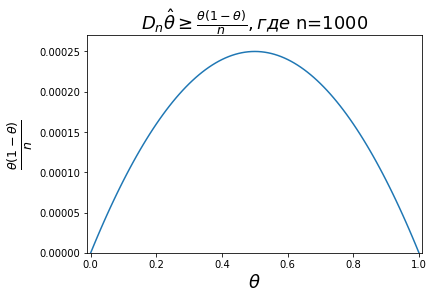

In [3]:
#Набор нижних оценок дисперсии несмещенной оценки из неравенства Рао-Крамера от theta.
low_est = np.zeros(len(theta)) 
low_est = (theta *(1 - theta)) / n
    
#Строим график зависимости нижней оценки дисперсии несмещенной 
#оценки из неравенства Рао-Крамера от theta.
plt.plot(theta, low_est)  
plt.ylim(0, 0.00027)
plt.xlim(-0.01,1.01)
plt.ylabel("$\\frac{\\theta(1-\\theta)}{n}$", fontsize = 18)
plt.xlabel("$\\theta$", fontsize = 18)
plt.title("$D_n \hat{\\theta} \geq \\frac{\\theta(1-\\theta)}{n}, где $ n="+"{}".format(n), fontsize = 18)                                                                          
plt.show()

Сгенерируем выборки для параметра $\theta$ и посчитаем эффективную оценку $\theta$ и бутстрепную оценку дисперсии этой эффективной оценки $\theta$.

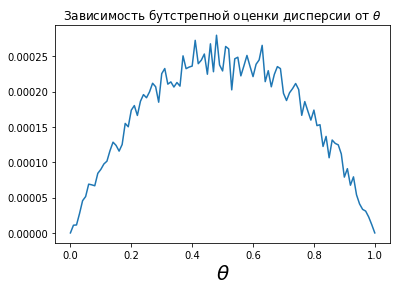

In [4]:
#набор бутстрепных оценок дисперсии
but_est = np.zeros(len(theta))
ef_est = np.zeros(len(theta))

for i in range(len(theta)):
    s = bernoulli.rvs(theta[i], size = n)
    ef_est = mean(s)
    
    #эффективная оценка параметра theta по бутстрепным выборкам
    but_ef_est = np.zeros(K) 
    for j in range(K):
        s_but = bernoulli.rvs(ef_est, size = n)
        but_ef_est[j] = mean(s_but)
    but_est[i] = var(but_ef_est)

plt.plot(theta, but_est)  
plt.xlabel("$\\theta$", fontsize=20)
plt.title("Зависимость бутстрепной оценки дисперсии от $\\theta$")                                                                      
plt.show()

#### Построим график для сравнения нижней оценки дисперсии параметра theta с помощью неравенства Рао-Крамера и бутстрепной оценки дисперсии.

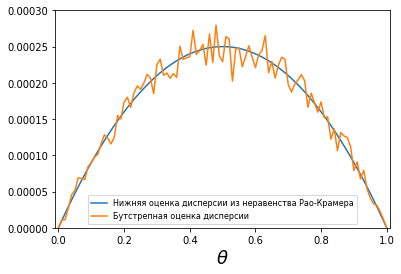

In [5]:
plt.plot(theta, low_est, label="Нижняя оценка дисперсии из неравенства Рао-Крамера")  
plt.plot(theta, but_est, label="Бутстрепная оценка дисперсии")
plt.ylim(0, 0.0003)
plt.xlim(-0.01,1.01)
plt.xlabel("$\\theta$", fontsize = 18)
plt.legend(fontsize=8, loc=0)
plt.show()